#### Part A

The Pulsation Period is 4.636393e+05s
Minimum Radius = 2.03R0 Maximum Radius = 44.5R0


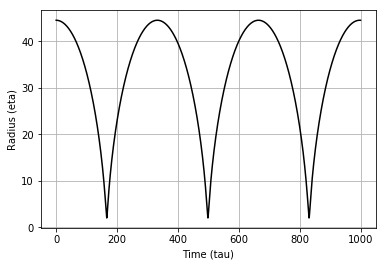

In [18]:
import phy4910 as phy
from matplotlib.pyplot import *
from numpy import *

def f(x,y,z):                                 #Function for first derivative
    return z

def g(x,y,z):                                 #Function for second derivative
    return -mu1/(y**2)+ (y**2)*p(y)/mu_s

def p(y):
    P= p0*(y0/y)**(5)
    return P

def stop(x,y,z,data):
    return

Period = 0

G = 6.674 *10**-11                            #N·kg–2·m2
M0 = 1.989 * 10**30                           #kg   1 Solar mass
R0= 6.95700*10**8                             #m   1 Solar radius

mu1 = 4.5                                     #mu_star
mu_s = 10**-5                                 #mu_s
targett = 4.63643 *10**5                      #period of delta cephei
tau = 1592                                    #s
p0 =0.1*10**-11                               #Equilibrium pressure is 1.14755*10**-11
dx = 0.00025                                  #integration step size
y0 = 44.5                                        
x0 = 0
xf  = 1000 #291.11
z0 = 0

X,Y,Z = phy.ode_rk4(x0,xf,dx,y0,z0,f,g)  


Period = 291.11*tau                            #The same period as delta cephei
yMin = min(Y)
yMax = max(Y)

print('The Pulsation Period is ' + format(Period,'e') + 's')
print('Minimum Radius = ' + str(round(yMin,2)) +'R0', 'Maximum Radius = ' + str(round(yMax,10)) +'R0')
phy.plot2(X,Y, xlabel='Time (tau)', ylabel="Radius (eta)")

#### Part B

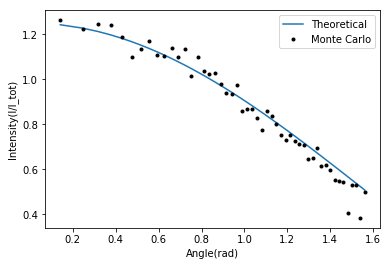

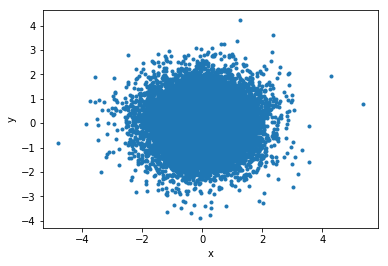

In [19]:
from numpy import *
from matplotlib.pyplot import *
import phy4910 as phy


NBins = 50                                        #Number of bins
N0 = 50000                                        #Number of photons
muBins = zeros(NBins)
xBins = zeros(NBins)
yBins = zeros(NBins)
Angles = zeros(NBins)

muList = zeros(N0)
xList = zeros(N0)
yList = zeros(N0)


def I_t(theta):                                   #Theoretical predictions
    return 1/2 + (3/4)*cos(theta)


for i in range(NBins):                               #Generate the list of angles at the center of each bin
    Angles[i] = arccos((1/(2*NBins) + i*(1/NBins)))

for i in range(N0):
    muList[i],phi,xList[i],yList[i] = phy.Move_Photon()
    muBins[int((muList[i])*NBins)]+=1

xMax = max(xList)
xMin = min(xList)
yMax = max(yList)
yMin = min(yList)

# for i in range(N0):                                                #For binning X and Y
#     xBins[int(round((xList[i]-((xMax-xMin)/(2*NBins)))*NBins/(xMax-xMin),1))]+=1
#     yBins[int(round((yList[i]-((yMax-yMin)/(2*NBins)))*NBins/(yMax-yMin),1))]+=1




    
    
for i in range(NBins):                                               #Normalizing intensity
    muBins[i] = muBins[i]/(2*cos(Angles[i])*N0/NBins)
plot(Angles,I_t(Angles) , label = 'Theoretical')
plot(Angles,muBins, 'k.', label = 'Monte Carlo')
xlabel('Angle(rad)')
ylabel('Intensity(I/I_tot)')
legend()
show()


plot(xList,yList , '.')
xlabel('x')
ylabel('y')
show()